In [55]:
import importlib
import re
import glob
from torchvision import transforms, datasets
from load_data import FrequencyDataset
import plots
import numpy as np
from utils import convert_tb_data, SCRATCH_PATH
import seaborn as sns
import matplotlib.pyplot as plt
# plots = importlib.reload()

In [2]:
df = convert_tb_data(root_dir=f"{SCRATCH_PATH}/logs/CIFAR10")

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [163]:
def poly_label(x):
    if 'poly2' in x:
        return 2
    elif 'poly6' in x:
        return 6
    else:
        return 0

def radius_label(x):
    if any(s in x for s in ('low4','high4')):
        return 4
    elif any(s in x for s in ('low8','high8')):
        return 8
    elif any(s in x for s in ('low12','high12')):
        return 12
    elif any(s in x for s in ('low16','high16')):
        return 16
    else:
        return 0

In [164]:
def add_plotting(df):
    df['polynomial'] = df['run'].apply(lambda x: poly_label(x))
    df['radius'] = df['run'].apply(lambda x: radius_label(x))

In [165]:
df_low = df.loc[df['run'].str.contains('low')]
df_high = df.loc[df['run'].str.contains('high')]

In [166]:
df_low_acc_train = df_low.loc[df_low['name'].str.contains('Accuracy/Train')].copy()
df_low_acc_test = df_low.loc[df_low['name'].str.contains('Accuracy/Test')].copy()
df_low_loss_train = df_low.loc[df_low['name'].str.contains('Loss/Train')].copy()
df_low_loss_test = df_low.loc[df_low['name'].str.contains('Loss/Test')].copy()

In [167]:
add_plotting(df_low_acc_train)
add_plotting(df_low_acc_test)
add_plotting(df_low_loss_train)
add_plotting(df_low_loss_test)

In [168]:
sns.set_theme()
sns.color_palette('husl')
palette ={4: "C0", 8: "C1", 12: "C2", 16: "C3"}

<AxesSubplot:title={'center':'Low Frequency - Train Accuracy'}, xlabel='step', ylabel='value'>

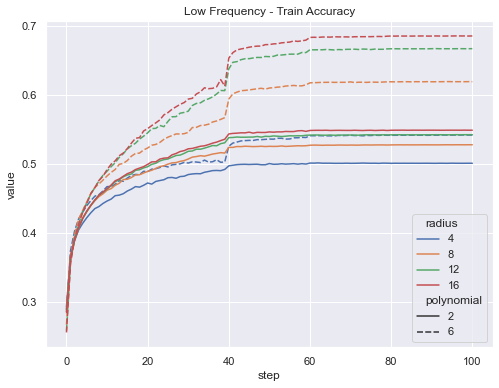

In [180]:
plt.figure(figsize=(8, 6))
plt.title('Low Frequency - Train Accuracy')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_low_acc_train, palette=palette)

<AxesSubplot:title={'center':'Low Frequency - Test Accuracy'}, xlabel='step', ylabel='value'>

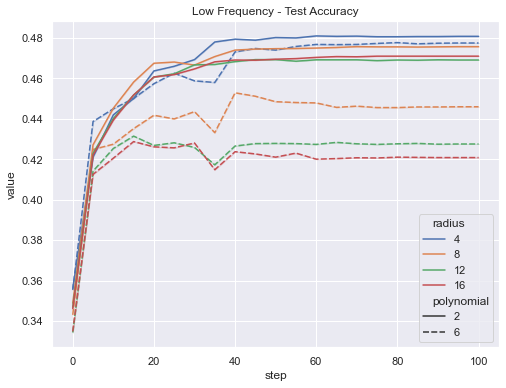

In [170]:
plt.figure(figsize=(8, 6))
plt.title('Low Frequency - Test Accuracy')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_low_acc_test, palette=palette)

<AxesSubplot:title={'center':'Low Frequency - Train Loss'}, xlabel='step', ylabel='value'>

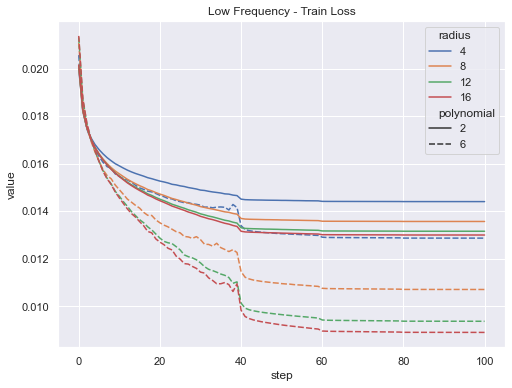

In [171]:
plt.figure(figsize=(8, 6))
plt.title('Low Frequency - Train Loss')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_low_loss_train, palette=palette)

<AxesSubplot:title={'center':'Low Frequency - Test Loss'}, xlabel='step', ylabel='value'>

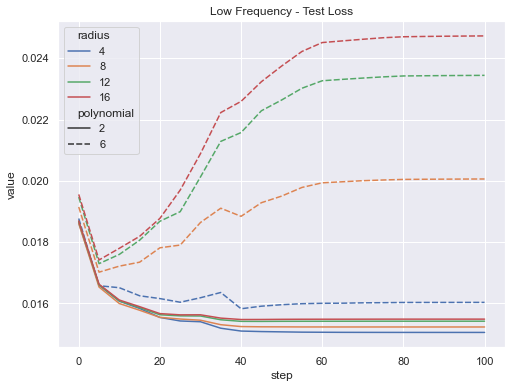

In [172]:
plt.figure(figsize=(8, 6))
plt.title('Low Frequency - Test Loss')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_low_loss_test, palette=palette)

In [173]:
df_high_acc_train = df_high.loc[df_high['name'].str.contains('Accuracy/Train')].copy()
df_high_acc_test = df_high.loc[df_high['name'].str.contains('Accuracy/Test')].copy()
df_high_loss_train = df_high.loc[df_high['name'].str.contains('Loss/Train')].copy()
df_high_loss_test = df_high.loc[df_high['name'].str.contains('Loss/Test')].copy()

In [174]:
add_plotting(df_high_acc_train)
add_plotting(df_high_acc_test)
add_plotting(df_high_loss_train)
add_plotting(df_high_loss_test)

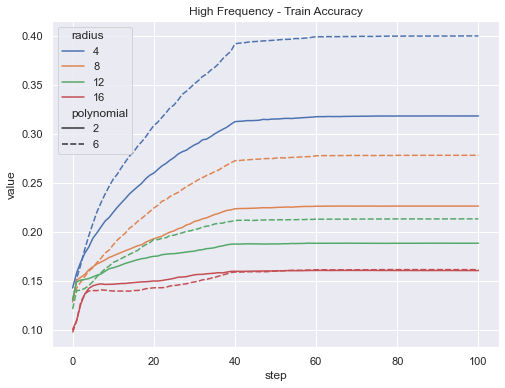

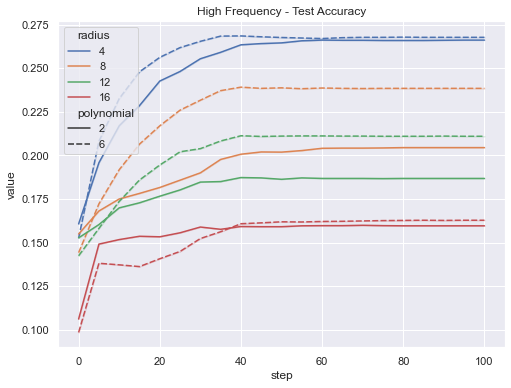

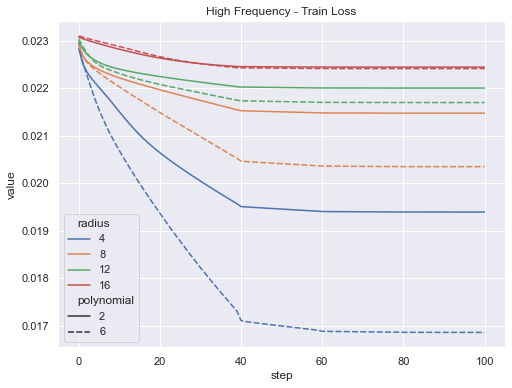

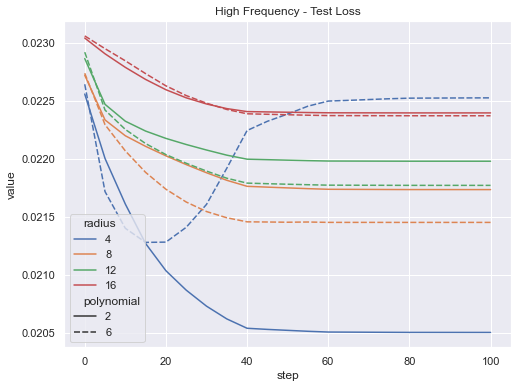

In [179]:
plt.figure(figsize=(8, 6))
plt.title('High Frequency - Train Accuracy')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_high_acc_train, palette=palette)
plt.show()

plt.figure(figsize=(8, 6))
plt.title('High Frequency - Test Accuracy')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_high_acc_test, palette=palette)
plt.show()

plt.figure(figsize=(8, 6))
plt.title('High Frequency - Train Loss')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_high_loss_train, palette=palette)
plt.show()

plt.figure(figsize=(8, 6))
plt.title('High Frequency - Test Loss')
sns.lineplot(x='step', y='value', hue='radius', style='polynomial', data = df_high_loss_test, palette=palette)
plt.show()